# HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

### Referência: [Heart Disease Prediction using Logistic Regression](https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression)

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.mlab as mlab
%matplotlib inline

### Data Preparation

In [2]:
heart_df = pd.read_csv("Framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head(n=10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
heart_df.shape

(4240, 15)

### Features


1. Demographic: 
    - sex: male or female (Nominal)


2. Behavioural: 
    - currentSmoker: whether or not the patient is a current smoker (Nominal)
    - cigsPerDay: the number of cigarettes that the person smoked on average in one day


3. Medical (history):
    - BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    - prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
    - prevalentHyp: whether or not the patient was hypertensive (Nominal)
    - diabetes: whether or not the patient had diabetes (Nominal)


4. Medical (current):
    - totChol: total cholesterol level (Continuous)
    - sysBP: systolic blood pressure (Continuous)
    - diaBP: diastolic blood pressure (Continuous)
    - BMI: Body Mass Index (Continuous)
    - heartRate: heart rate (Continuous)
    - glucose: glucose level (Continuous)


5. Predict variable (desired target): 
    - TenYearCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### Verifying Missing values

In [4]:
heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
count = (heart_df.isnull().sum(axis=1) > 0).sum()

print(f'Total number of rows with missing values is {count}.')
print(f'Since it\'s only {100*count/heart_df.shape[0]:.2f}% of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is 489.
Since it's only 11.53% of the entire dataset the rows with missing values are excluded.


In [6]:
heart_df.dropna(axis=0, inplace=True)

In [7]:
heart_df.head(n=10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [8]:
heart_df.shape

(3751, 15)

### Avaliando o Histograma do Dataset

In [9]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

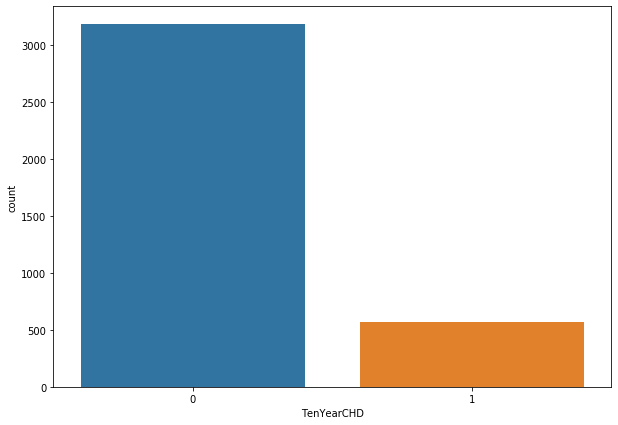

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='TenYearCHD', data=heart_df)
plt.show()

### Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a **categorical** dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for **prediction** and also calculating the **probability** of success.

In [11]:
feature_list = heart_df.columns[:-1].values

X = heart_df[feature_list].values
y = heart_df.TenYearCHD.values

feature_list

array(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'], dtype=object)

In [12]:
model = LogisticRegression().fit(X, y)


/home/zanco/miniconda3/envs/qualirede/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
coefficients = np.hstack([model.intercept_, model.coef_.ravel()])
results = pd.DataFrame(coefficients, index=['const', *feature_list], columns=['coefficients'])
results

,coefficients
const,-5.918433
male,0.504155
age,0.052053
currentSmoker,-0.008579
cigsPerDay,0.018669
BPMeds,0.234733
prevalentStroke,0.638425
prevalentHyp,0.426608
diabetes,0.191125
totChol,0.000992


### Splitting data to train and test split

In [14]:
relevant_list = ['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']

new_features = heart_df[relevant_list]


x = new_features.iloc[:,:-1].values
y = new_features.iloc[:,-1].values

new_features.head(10)

,age,male,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,39,1,0.0,195.0,106.0,77.0,0
1,46,0,0.0,250.0,121.0,76.0,0
2,48,1,20.0,245.0,127.5,70.0,0
3,61,0,30.0,225.0,150.0,103.0,1
4,46,0,23.0,285.0,130.0,85.0,0
5,43,0,0.0,228.0,180.0,99.0,0
6,63,0,0.0,205.0,138.0,85.0,1
7,45,0,20.0,313.0,100.0,78.0,0
8,52,1,0.0,260.0,141.5,79.0,0
9,43,1,30.0,225.0,162.0,88.0,0


In [15]:
results['coefficients'][relevant_list[:-1]]

age           0.052053
male          0.504155
cigsPerDay    0.018669
totChol       0.000992
sysBP         0.014787
glucose       0.005921
Name: coefficients, dtype: float64

In [16]:
x.shape, y.shape

((3751, 6), (3751,))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [18]:
x_train.shape, x_test.shape

((3000, 6), (751, 6))

In [19]:
logreg = LogisticRegression().fit(x_train,y_train)
y_pred = logreg.predict(x_test)



/home/zanco/miniconda3/envs/qualirede/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Evaluation

In [20]:
sklearn.metrics.accuracy_score(y_test,y_pred)


0.881491344873502

### Confusion matrix

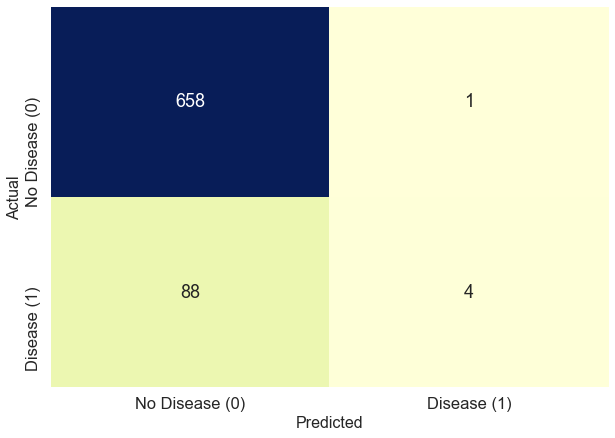

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

class_list = ['No Disease (0)', 'Disease (1)']
conf_matrix = pd.DataFrame(data=cm, columns=class_list, index=class_list)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

- True Positives (TP): 4

- True Negatives (TN): 658

- False Positives (FP): 1 (Type I error)

- False Negatives (FN): 88 (Type II error)

In [22]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
TN

658

In [23]:
print(f'Sensitivity: {100 * sensitivity}%')

Sensitivity: 4.3478260869565215%


In [24]:
print(f'Specificity: {100 * specificity}%')

Specificity: 99.84825493171472%


## Model Evaluation - Statistics

In [25]:
print(' The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

 The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.881491344873502 
 The Missclassification = 1-Accuracy =  0.118508655126498 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.043478260869565216 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9984825493171472 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8820375335120644 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  28.65217391304351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9579754195850403


### Predictions of 0 (No Disease) and 1 (Disease) for the test data

In [26]:
y_pred_prob = logreg.predict_proba(x_test)
y_pred = y_pred_prob[:,1].copy()

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head(n=10)

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.859991,0.140009
1,0.930990,0.069010
2,0.792031,0.207969
3,0.814827,0.185173
4,0.875303,0.124697
5,0.875467,0.124533
6,0.885114,0.114886
7,0.875198,0.124802
8,0.832464,0.167536
9,0.935395,0.064605


## ROC curve

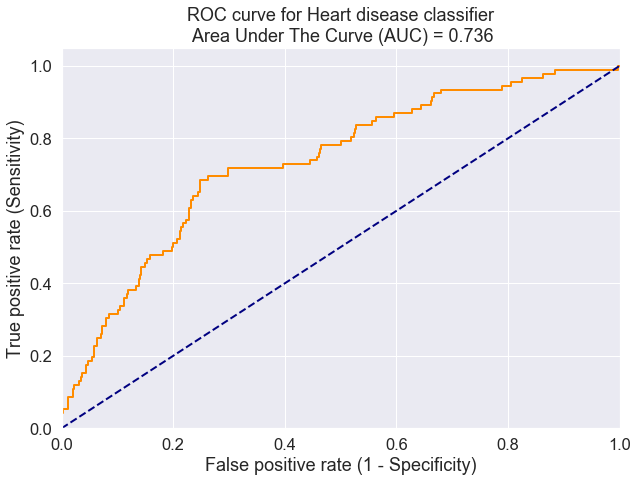

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title(f'ROC curve for Heart disease classifier\n Area Under The Curve (AUC) = {auc:.3f}')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)